# EDA (exploratory data analysis)

1. load datasets
2. Clean data (missing values , duplicates, types)
4. treat outliers
5. insights for each step


## outlier - 
###       a data point which is significantly different than other points of the dataset

how outliers will come ?
- measurement errors
- data entry mistakes
- 

why are outliers needed to be considered ?
- because they can sometime disrupt the thinking of a machine if we train the machine with the data

1. They can be errors
2.  they can affect the data analysis

How to identify the outliers?
- statistical methods
    ---> interquartile Range (IQR)
    ---> Z score
- visualisation techniques
    ---> scatter plot
    ---> box plot
    ---> histograms


###  UNIvariate analysis - 
a method that analyses a single var to describe its characteristics and finding patterns and summarise tha data.

- it invloves only one var 

## BIvariate analysis : 
it gives the relations between two vars, it helps to discover or find if there is any corr between the two vars and any associations or any connection between the two vars
- it involves 2 variables

## Multivariate analysis:
to understand how multiple vars interact and influence each other
- it invloves more than 2

ex- how our age, income and education together influence the purchasing behavior


# ETL (extract transform Load)
# ELT (extract load transform)

# EDA : <Dataset>

1. Load & Overview
2. Cleaning (missing, dupes, dtypes)
3. Uni, Bi , multi 
4. outliers
5. feature engineering
6. key insights

- feature engineering - "F.E is the process of turning the raw data into useful fetures" that helps to improve the performance of machine learning

In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Load dataset
df = sns.load_dataset("titanic")

# Convert all column names to lowercase
df.columns = df.columns.str.lower()

# Basic overview
print("Dataset shape:", df.shape)
print("\nDataset info:")
print(df.info())
print("\nFirst 5 rows:")
print(df.head())
print("\nStatistical summary:")
print(df.describe())

# --- Missing values analysis ---
missing = pd.DataFrame({
    'missing_count': df.isnull().sum(),
    'missing_percent': (df.isnull().sum() / len(df)) * 100
})
print("\nMissing values sorted by percentage:")
print(missing.sort_values(by='missing_percent', ascending=False))

# --- Fill numeric missing values with mean ---
if 'age' in df.columns:
    df['age'] = pd.to_numeric(df['age'], errors='coerce')  # ensure numeric
    df['age'].fillna(df['age'].mean(), inplace=True)
    print("\nAge column after filling missing values:\n", df['age'])
    print("Number of missing values in Age:", df['age'].isnull().sum())

# --- Fill categorical missing values with mode ---
if 'embarked' in df.columns:
    df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)
    print("\nNumber of missing values in Embarked:", df['embarked'].isnull().sum())

# --- Drop unwanted column safely ---
if 'deck' in df.columns:
    df.drop(columns=['deck'], inplace=True)

# --- Duplicates & Data Type check ---
print("\nNumber of duplicate rows:", df.duplicated().sum())
print("\nData types of columns:\n", df.dtypes)


Dataset shape: (891, 15)

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None

First 5 rows:
   survived  pclass

C:\Users\vamsh\AppData\Local\Temp\ipykernel_22196\2094625591.py:33: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].mean(), inplace=True)
C:\Users\vamsh\AppData\Local\Temp\ipykernel_22196\2094625591.py:39: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

In [29]:
# Convert all object-type columns to category
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].astype('category')

# Verify conversion
print("\nData types after conversion:\n", df.dtypes)



Data types after conversion:
 survived          int64
pclass            int64
sex            category
age             float64
sibsp             int64
parch             int64
fare            float64
embarked       category
class          category
who            category
adult_male         bool
embark_town    category
alive          category
alone              bool
dtype: object


In [30]:
# Step 6 - univariate analysis
num_cols =df.select_dtypes(include=['float64','int64']).columns
df[num_cols].describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


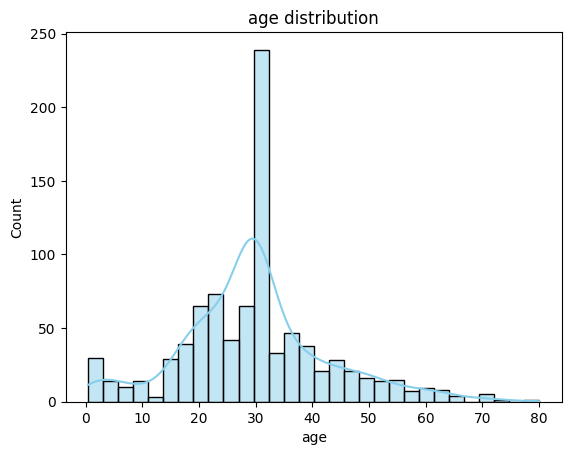

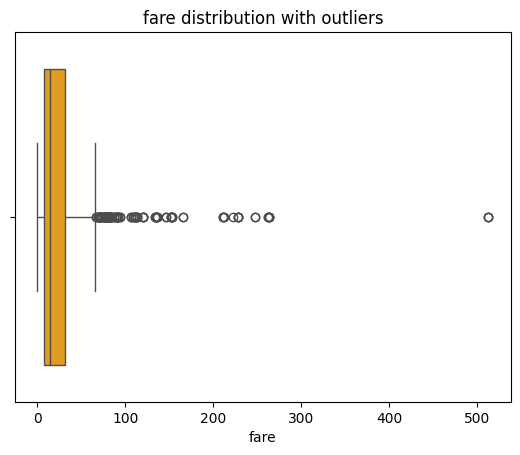

In [31]:
sns.histplot(df['age'],bins=30,kde=True,color='skyblue')
plt.title("age distribution")
plt.show()

sns.boxplot(x=df['fare'],color='orange')
plt.title("fare distribution with outliers")
plt.show()



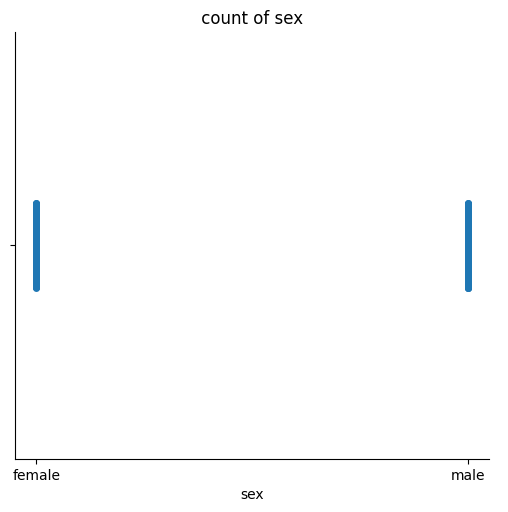

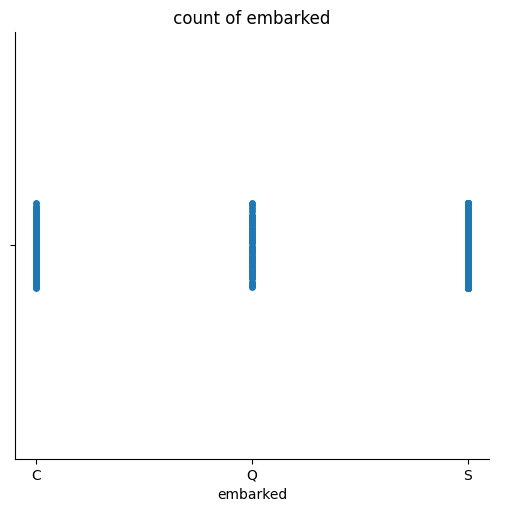

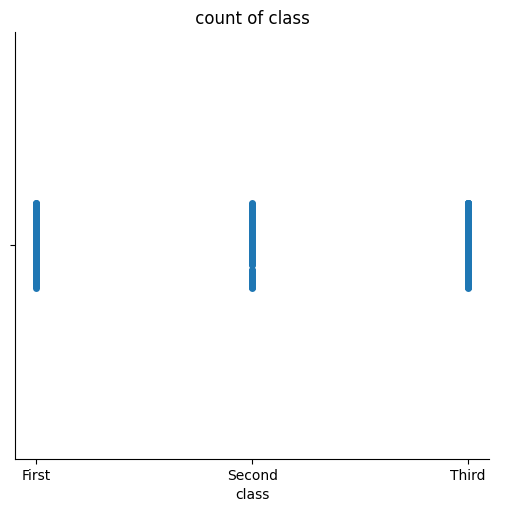

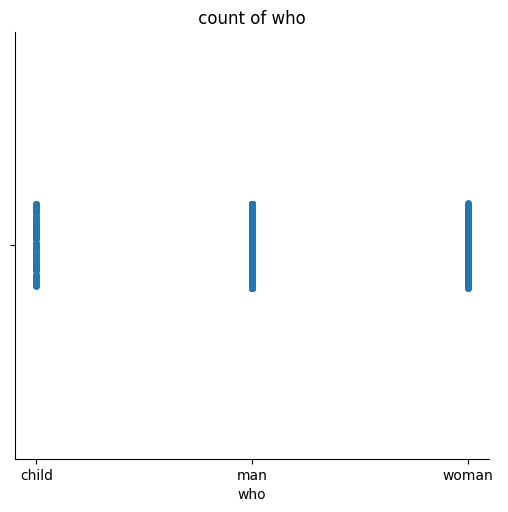

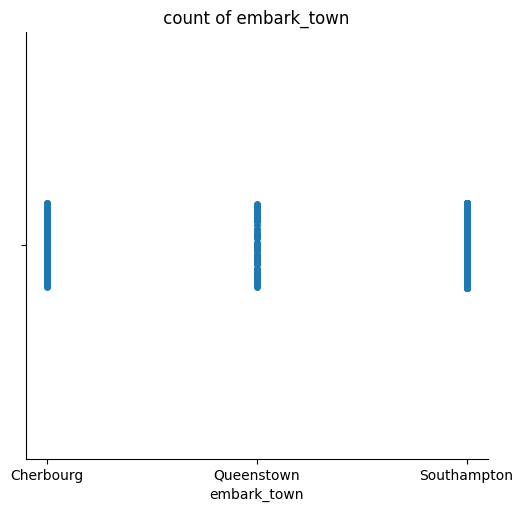

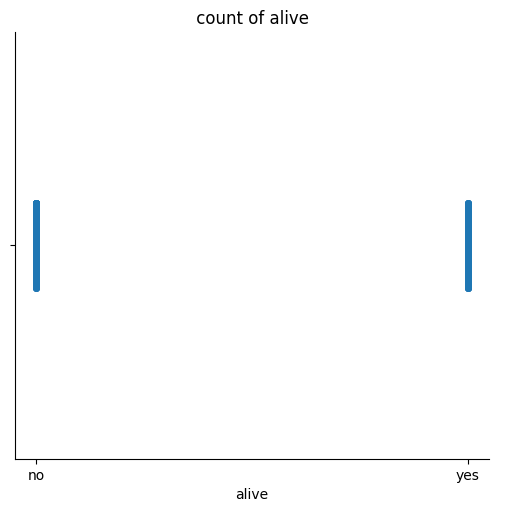

In [32]:
#univariate analysis 

cat_cols = df.select_dtypes('category').columns

for col in cat_cols:
    sns.catplot(x=col,data=df)
    plt.title(f" count of {col} ")
    plt.show()

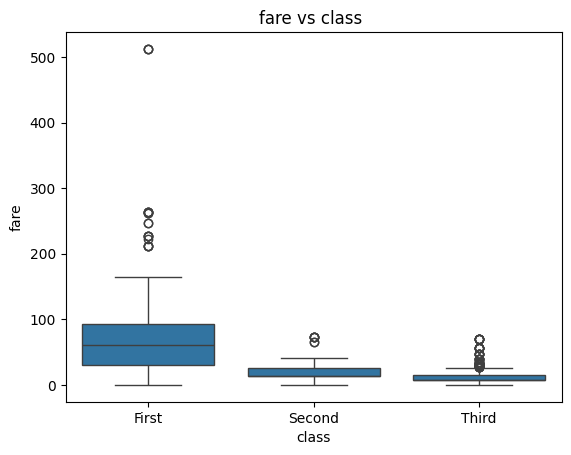

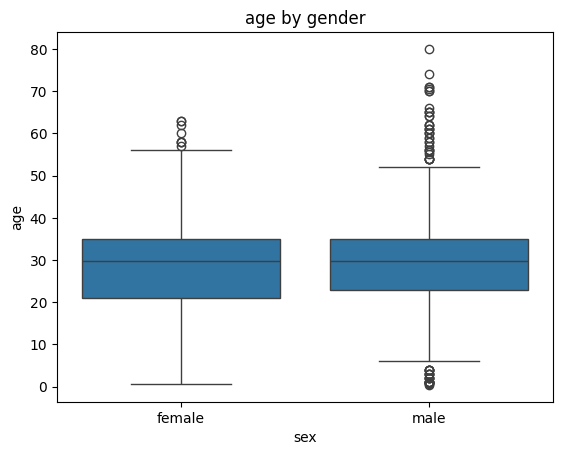

In [33]:
# bivariate analysis - Numerical vs categorical

sns.boxplot(x='class',y='fare', data=df)
plt.title("fare vs class ")
plt.show()

sns.boxplot(x='sex',y='age',data=df)
plt.title("age by gender")
plt.show()


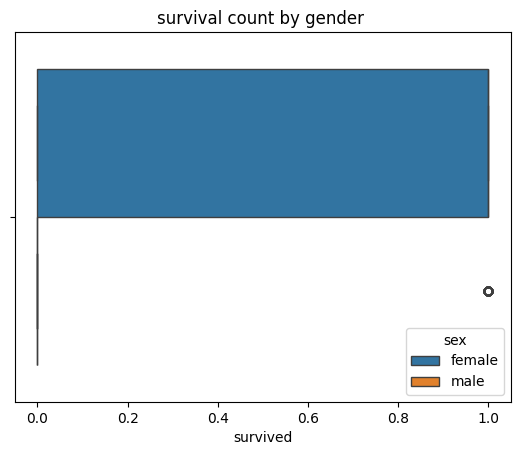

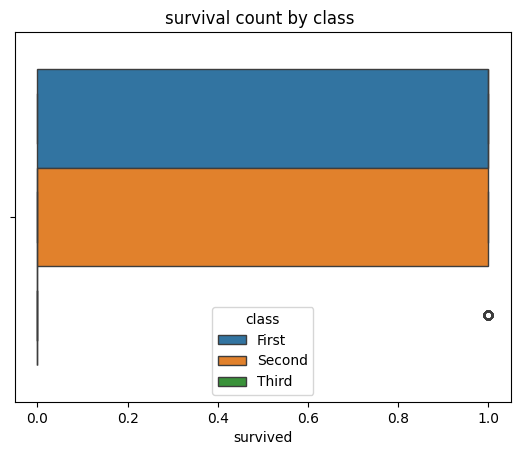

In [35]:
sns.boxplot(x='survived',hue='sex',data=df)
plt.title("survival count by gender ")
plt.show()

sns.boxplot(x='survived',hue='class',data=df)
plt.title("survival count by class ")
plt.show()

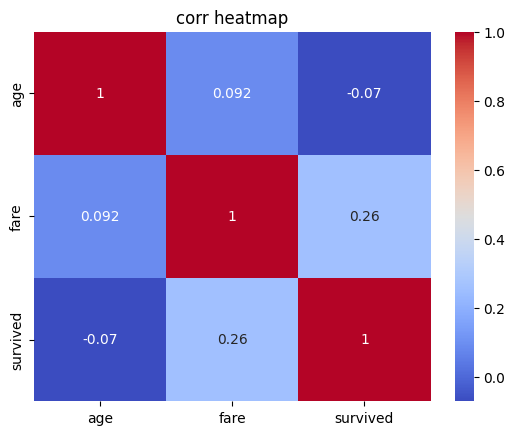

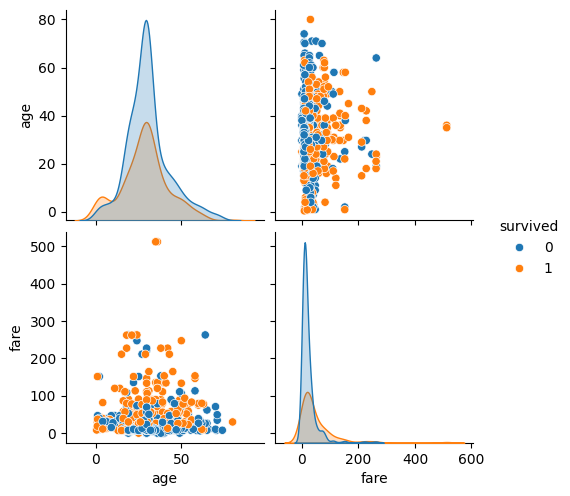

In [39]:
# corr and multivariate analysis 

corr=df[['age','fare','survived']].corr()
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.title("corr heatmap")
plt.show()

sns.pairplot(df[['age','fare','survived']],hue='survived')
plt.show()

insights:
1. Fare has a +ve corr with survival
2. Age shows a alight -ve corr with survival

number of outliers in fare:  891


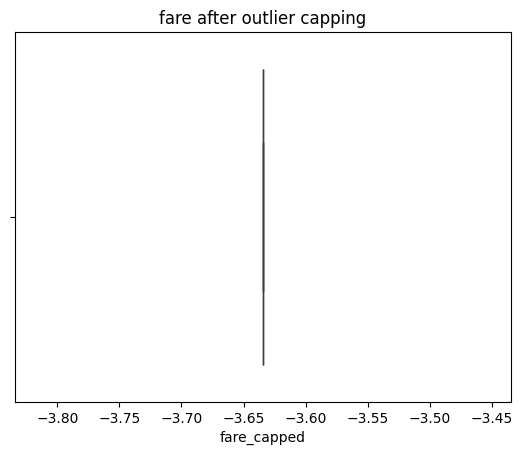

In [44]:
# outlier Detection using IQR

Q1 = df['fare'].quantile(0.25)
Q3= df['fare'].quantile(0.75)
IQR = Q3-Q1

lower = Q1- 1.5* IQR
upper = Q3- 1.5* IQR

outliers = df[(df['fare']<lower) | (df['fare']>upper) ]

print("number of outliers in fare: ",len(outliers))

#outliers
df['fare_capped']=df['fare'].clip(lower,upper)
sns.boxplot(x=df['fare_capped'])
plt.title("fare after outlier capping")
plt.show()

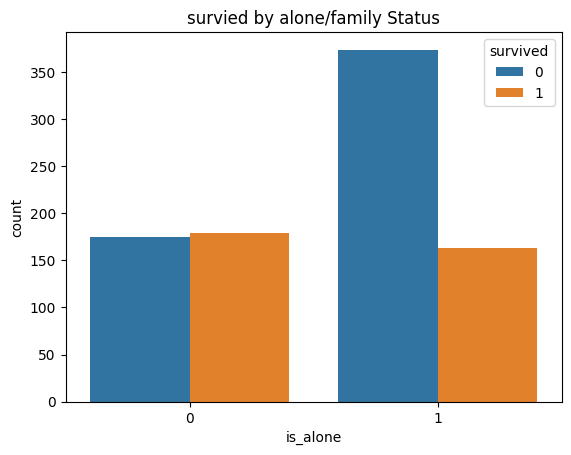

38.38%


In [50]:
#feature engineering

# creating new features 
#sibsp- sibling+spouse
#parch - parent children
df['family_size']= df['sibsp'] + df['parch'] + 1

df['is_alone']=(df['family_size']==1).astype(int)

sns.countplot(x='is_alone',hue='survived',data=df)
plt.title("survied by alone/family Status")
plt.show()

with_family = df[df['family_size'] > 0]
survival_percent = (with_family['survived'].sum() / len(with_family)) * 100
print(f"{survival_percent:.2f}%")


In [51]:
df.to_csv("titanic_cleaned.csv",index=False)
print("\n Cleaned the data and saved to titanic_cleaned.csv")


 Cleaned the data and saved to titanic_cleaned.csv
